In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
TF_ENABLE_ONEDNN_OPTS=0

Sample happy image:


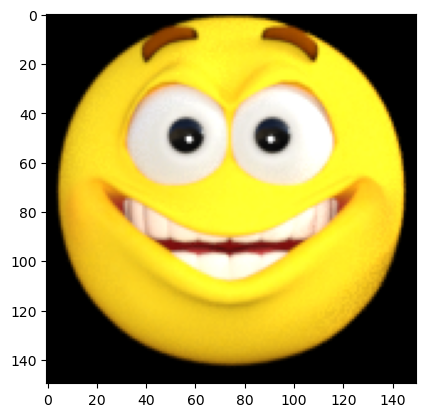


Sample sad image:


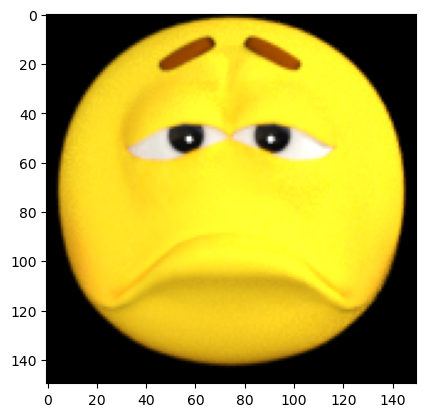

In [14]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [15]:

from tensorflow.keras.preprocessing.image import img_to_array

sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True    

In [18]:
#https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def image_generator():
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode= 'binary')

    return train_generator
    

In [19]:
gen = image_generator()

Found 80 images belonging to 2 classes.


In [20]:
gen

In [27]:
def train_happy_sad_model(train_generator):

    callbacks = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])     


    history = model.fit(x=train_generator,
                        epochs=15,
                        callbacks=[callbacks]
                       )
    return history

In [28]:
hist = train_happy_sad_model(gen)

Epoch 1/15
8/8 [==============================] - 2s 91ms/step - loss: 0.8875 - accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 1s 65ms/step - loss: 0.5779 - accuracy: 0.7125
Epoch 3/15
8/8 [==============================] - 1s 65ms/step - loss: 0.3291 - accuracy: 0.8375
Epoch 4/15
8/8 [==============================] - 1s 65ms/step - loss: 0.1485 - accuracy: 0.9500
Epoch 5/15
8/8 [==============================] - 1s 65ms/step - loss: 0.0562 - accuracy: 0.9875
Epoch 6/15
8/8 [==============================] - 1s 64ms/step - loss: 0.0360 - accuracy: 0.9875
Epoch 7/15
8/8 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 1s 65ms/step - loss: 0.0091 - accuracy: 1.0000


In [31]:
hist

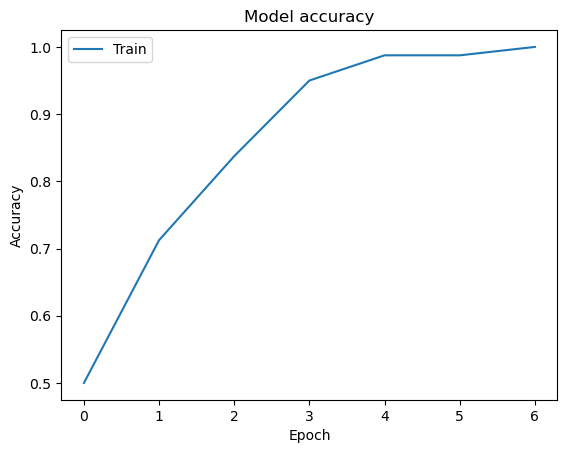

In [38]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

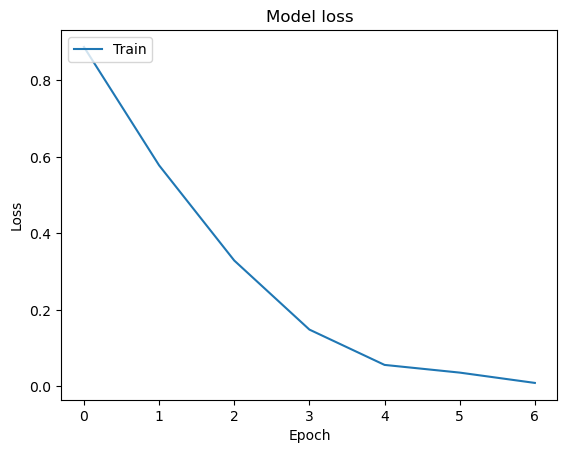

In [39]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
# Access the first batch
batch_images, batch_labels = next(gen)

print("Batch images shape:", batch_images.shape)
print("Batch labels shape:", batch_labels.shape)

# Optionally, print a summary of a single image and its label
print("\nExample image data (first image of the batch):", batch_images[0])
print("Example label data (label for the first image of the batch):", batch_labels[0])


Batch images shape: (10, 150, 150, 3)
Batch labels shape: (10,)

Example image data (first image of the batch): [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Example label data (label for the first image of the batch): 0.0
